# Data Analytics using Pandas, Matplotlib, NumPy

In [22]:
# Hello Everyone, in this project we will work on the "most streamed spotify songs till 2024" data which is taken from the kaggle.
# here we will analyze and visualize data so that we can take insights from it and answer quuestions given by stakeholders

# We will analyze data in 4 steps
# step-1 : Import and Prepare 
# step-2 : process/clean  
# step-3 : Analyze
# step-4 : Visualize

## Step-1 : Import and Prepare

In this step we just import required modules, data set and prepare data in required formate

In [19]:
# import required libraries used in the module

import pandas as pd #data processing
import numpy as np #Linear algebra
from matplotlib import pyplot as plt

df = pd.read_csv('Most Streamed Spotify Songs 2024.csv',parse_dates=['Release Date'],encoding='latin-1')

## Step-2 : Process/Cleaning

We will follow these steps to clean data:

1.Missing Values: Handle missing values appropriately, such as by imputing or removing rows with missing data, depending on the context and the proportion of missing values.

2.Data Types: Convert any columns with incorrect data types.

3.Duplicate Entries: Ensure that each row represents a unique song.

4.Outliers: Handle any outliers in the data, such as by winsorizing or removing them, depending on the nature of the data and the potential impact of the outliers.

5.Data Formatting: Ensure data is formatted consistently, such as by standardizing date and time formats, capitalizing names, and removing any unnecessary whitespace or special characters.

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   object        
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   object        
 8   Spotify Playlist Count      4530 non-null   object        
 9   Spotify Playlist Reach      4528 non-null   object        
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   object      

In [4]:
# handling missing values if the columns has at most missing values then delete that columns, you can also delete unneccessary columns
# from your data set

df_missing = df.isna().sum().reset_index().rename(columns={'index':'Columns',0:'missing values'})
df_missing.sort_values(by='missing values',ascending=False)

,Columns,missing values
27,TIDAL Popularity,4600
25,Soundcloud Streams,3333
19,SiriusXM Spins,2123
24,Pandora Track Stations,1268
13,TikTok Posts,1173
23,Pandora Streams,1106
22,Amazon Playlist Count,1055
16,YouTube Playlist Reach,1009
15,TikTok Views,981
14,TikTok Likes,980


In [5]:
# Deleting 2 colums from the data set

df.drop(['TIDAL Popularity','Soundcloud Streams'],axis=1,inplace=True)

In [6]:
# fill null values with 0
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].fillna(int(0))
df['Spotify Playlist Reach'] = df['Spotify Playlist Reach'].fillna(int(0))

In [7]:
# removing ',' from count and reach columns
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].apply(lambda x: str(x).replace(',',''))
df['Spotify Playlist Reach'] = df['Spotify Playlist Reach'].apply(lambda x: str(x).replace(',',''))

In [8]:
# converting above columns to int64 dtype
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].astype('int64')
df['Spotify Playlist Reach'] = df['Spotify Playlist Reach'].astype('int64')

In [9]:
# check for the duplicate entries 

df.loc[df.duplicated()]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,2022-09-02,TCAGJ2289254,"2,424",28.9,"227,893,586",28139,12480714,...,33.0,"129,172",34,5.0,"1,370",49.0,"56,972,562","26,968","708,143",0
3450,Dembow,Dembow,Danny Ocean,2017-12-08,USWL11700269,"3,441",23.3,"579,189,526",60397,11805084,...,34.0,"5,406",9,20.0,"37,649",12.0,"6,723,858","7,832","1,619,550",0


In [10]:
# drop duplicate values from data set

df.drop_duplicates(keep='first',inplace=True)

In [11]:
# handling outliers in Apple Music Playlist Count 

df['Apple Music Playlist Count'] = df['Apple Music Playlist Count'].apply(lambda x: str(x).replace(str(x),str(54)) if float(x)>=400 else float(x))

In [12]:
# removing whitespace from entire data using 

df.applymap(lambda x: str(x).strip())

/var/folders/_m/45rl_rhs2hbbg39msk60g9rh0000gn/T/ipykernel_1037/2116562819.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: str(x).strip())


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26 00:00:00,QM24S2402528,1,725.4,"390,470,936",30716,196631588,...,210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04 00:00:00,USUG12400910,2,545.9,"323,703,884",28113,174597137,...,188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19 00:00:00,QZJ842400387,3,538.4,"601,309,283",54331,211607669,...,190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12 00:00:00,USSM12209777,4,444.9,"2,031,280,633",269802,136569078,...,394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384","11,822,942",0
4,Houdini,Houdini,Eminem,2024-05-31 00:00:00,USUG12403398,5,423.3,"107,034,922",7223,151469874,...,182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","457,017",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05 00:00:00,QM8DG1703420,"4,585",19.4,"305,049,963",65770,5103054,...,3.0,6,nan,2.0,"14,217",nan,"20,104,066","13,184","656,337",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27 00:00:00,INT101800122,"4,575",19.4,"52,282,360",4602,1449767,...,1.0,412,nan,1.0,927,nan,nan,nan,"193,590",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28 00:00:00,USUG12000043,"4,571",19.4,"189,972,685",72066,6704802,...,19.0,204,nan,1.0,74,6.0,"84,426,740","28,999","1,135,998",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08 00:00:00,INY091600067,"4,591",19.4,"145,467,020",14037,7387064,...,1.0,"1,200",nan,nan,nan,7.0,"6,817,840",nan,"448,292",0


# Step-3 : Analyzing

In this step we are going to analyze data, before analyzing we will format data based on the requirements of stakeholders

In [13]:
# creating new column as year extracting from Release Date column using datetime

df['Year'] = df['Release Date'].dt.year

In [18]:
# Grouping years wise and counting how many tracks released in specific year

df_groupby_year = df.groupby('Year')
df_groupby_year.count()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
Year,,,,,,,,,,,,,,,,,,,,,
1987,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1991,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1994,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1998,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1999,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2000,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2001,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
2002,5,5,5,5,5,5,5,5,5,5,...,5,5,4,5,5,5,4,4,5,5
2003,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,1,1,2,3


<Figure size 1000x800 with 0 Axes>

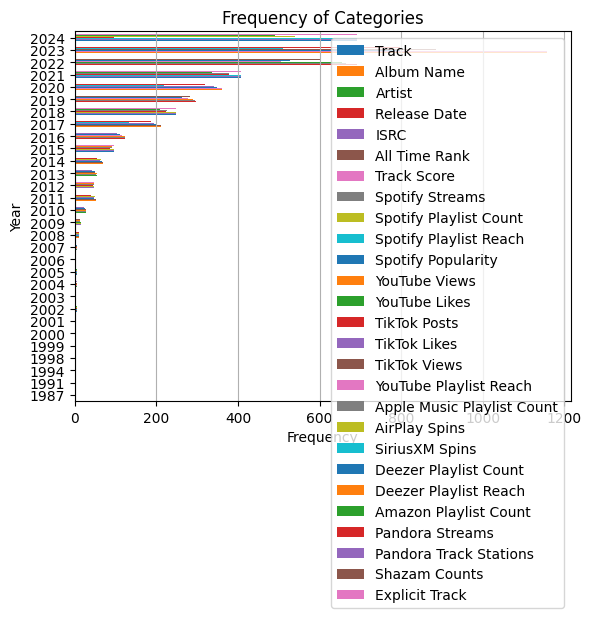

In [21]:
plt.figure(figsize=(10,8))
df_groupby_year.count().plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Year')
plt.title('Frequency of Categories')
plt.grid(axis='x')
plt.show()

In [ ]:
# Above figure clearly shows that, Listening and releasing songs getting gradually increasing.